In [151]:
#importar Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [152]:
#Ler os dados

Base_dados = pd.read_csv('./unicorns-till-sep-2022.csv')

# Verificar Doimensao
Base_dados.shape

(1186, 7)

In [153]:
# Carregar o arquivo CSV em um DataFrame
Base_dados = pd.read_csv('./unicorns-till-sep-2022.csv')

# Inserir uma nova coluna 'ID' na primeira posição (índice 0)
Base_dados.insert(0, "ID", range(1, len(Base_dados) + 1))

# Exibir o DataFrame resultante
print(Base_dados)

        ID              Company Valuation ($B) Date Joined        Country  \
0        1            ByteDance           $140    4/7/2017          China   
1        2               SpaceX           $127   12/1/2012  United States   
2        3                SHEIN           $100    7/3/2018          China   
3        4               Stripe            $95   1/23/2014  United States   
4        5                Canva            $40    1/8/2018      Australia   
...    ...                  ...            ...         ...            ...   
1181  1182          LeadSquared             $1   6/21/2022          India   
1182  1183            FourKites             $1   6/21/2022  United States   
1183  1184          VulcanForms             $1    7/5/2022  United States   
1184  1185          SingleStore             $1   7/12/2022  United States   
1185  1186  Unstoppable Domains             $1   7/27/2022  United States   

              City                              Industry  \
0           Bei

In [154]:
 # Primeiros Registros
Base_dados.head()


,ID,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,1,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,2,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,3,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,4,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,5,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [155]:
Base_dados.columns

Index(['ID', 'Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City ',
       'Industry', 'Investors'],
      dtype='object')

In [156]:
# Renomear

Base_dados.rename(columns= {
    'Company' : 'Empresa',
    'Valuation ($B)' : 'Valor ($B)',
    'Date Joined' : 'Data de Adesão',
    'Country' : 'Pais',
    'City' : 'Cidade', 
    'Industry' : 'Setor',
    'Investors' : 'Investidores',
      
}, inplace = True)

In [157]:
# Verificar Tipo da Informação 

Base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              1186 non-null   int64 
 1   Empresa         1186 non-null   object
 2   Valor ($B)      1186 non-null   object
 3   Data de Adesão  1186 non-null   object
 4   Pais            1186 non-null   object
 5   City            1186 non-null   object
 6   Setor           1186 non-null   object
 7   Investidores    1168 non-null   object
dtypes: int64(1), object(7)
memory usage: 74.3+ KB


In [158]:
#Campos Nulos
Base_dados.isnull().sum()

ID                 0
Empresa            0
Valor ($B)         0
Data de Adesão     0
Pais               0
City               0
Setor              0
Investidores      18
dtype: int64

<Axes: title={'center': 'Analisando Campos'}>

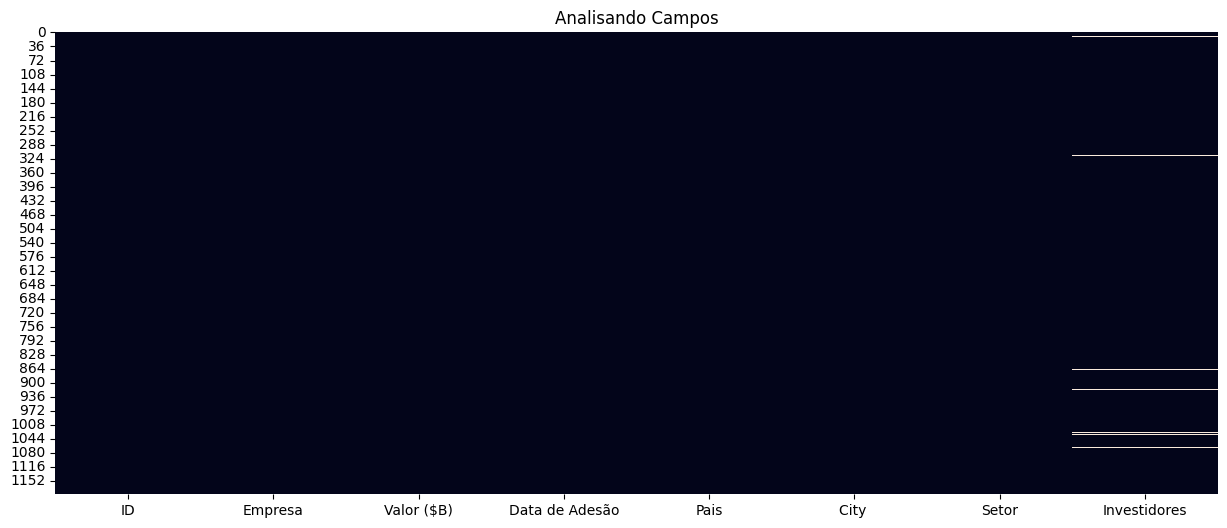

In [159]:
#Grafico

plt.figure(figsize=(15,6))
plt.title('Analisando Campos')
sns.heatmap(Base_dados.isnull(), cbar=False)


In [160]:
# Campos Unicos
Base_dados.nunique()

ID                1186
Empresa           1183
Valor ($B)         222
Data de Adesão     695
Pais                48
City               286
Setor               34
Investidores      1152
dtype: int64

In [161]:
#Valores Unicos 😄
Base_dados['Setor'].unique()

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics',
       'Sequoia Capital, Thoma Bravo, Softbank', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Kuang-Chi',
       'Tiger Global Management, Tiger Brokers, DCM Ventures',
       'Jungle Ventures, Accel, Venture Highway',
       'Artificial Intelligence', 'GIC. Apis Partners, Insight Partners',
       'Vision Plus Capital, GSR Ventures, ZhenFund',
       'Hopu Investment Management, Boyu Capital, DC Thomson Ventures',
       'Internet', '500 Global, Rakuten Ventures, Golden Gate Ventures',
       'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund',
       'Sequoia Capital China, Shunwei Capital Partners, Qualgro',
       'Dragonfly Captial, Qiming Venture Pa

In [162]:
# Valores Unicos - Rank em %

Base_dados['Setor'].value_counts( normalize=True)*100

Setor
Fintech                                                               20.151771
Internet software & services                                          18.887015
E-commerce & direct-to-consumer                                        8.684654
Health                                                                 7.925801
Artificial intelligence                                                6.239460
Supply chain, logistics, & delivery                                    5.480607
Other                                                                  5.480607
Cybersecurity                                                          4.890388
Data management & analytics                                            3.794266
Auto & transportation                                                  3.372681
Hardware                                                               3.204047
Mobile & telecommunications                                            3.119730
Edtech                            

In [163]:
# Valores Unicos - Rank

Base_dados['Setor'].value_counts()

Setor
Fintech                                                               239
Internet software & services                                          224
E-commerce & direct-to-consumer                                       103
Health                                                                 94
Artificial intelligence                                                74
Supply chain, logistics, & delivery                                    65
Other                                                                  65
Cybersecurity                                                          58
Data management & analytics                                            45
Auto & transportation                                                  40
Hardware                                                               38
Mobile & telecommunications                                            37
Edtech                                                                 32
Consumer & retail               

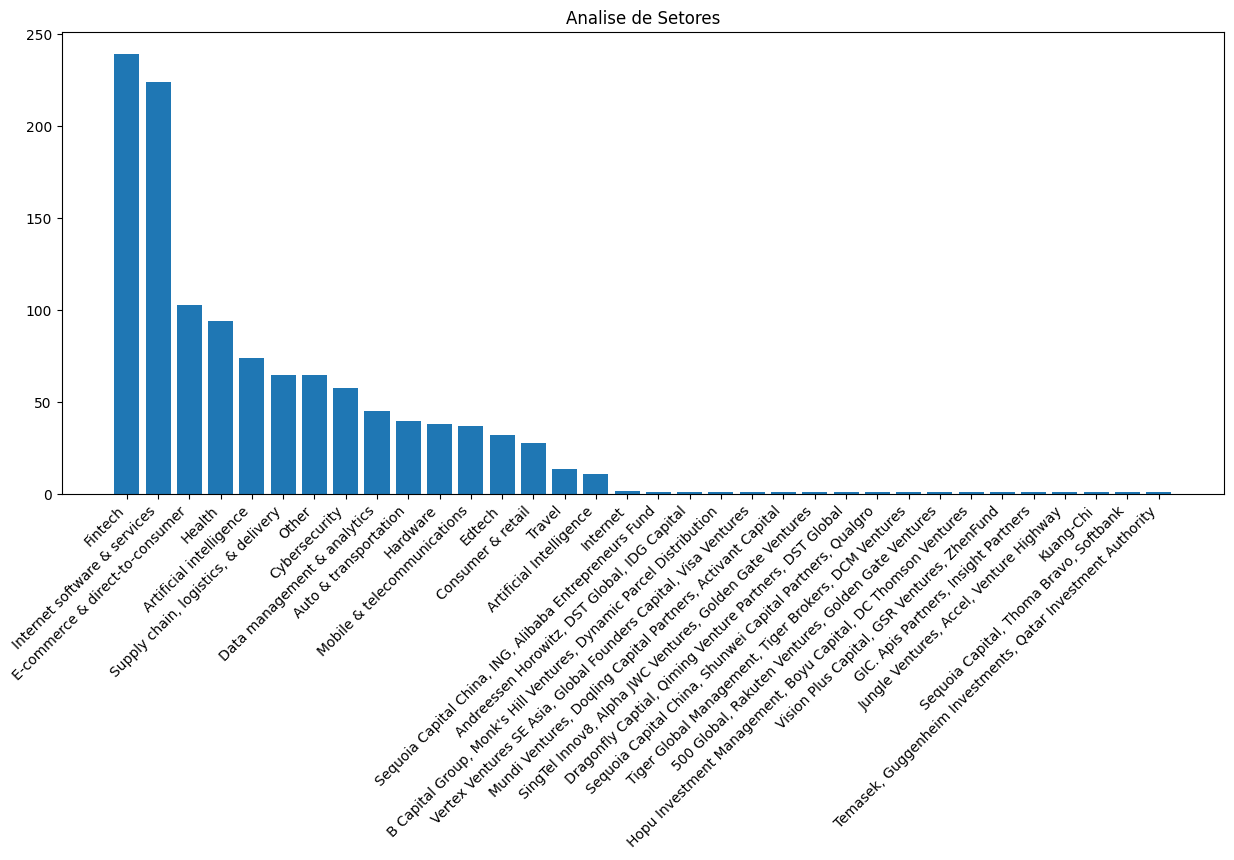

In [164]:
#Grafico
plt.figure(figsize=(15,6))
plt.title('Analise de Setores')
plt.bar(Base_dados['Setor'].value_counts().index, Base_dados['Setor'].value_counts() )
plt.xticks(rotation=45, ha='right');

In [165]:
Analise = round(Base_dados['Pais'].value_counts(normalize=True)*100)

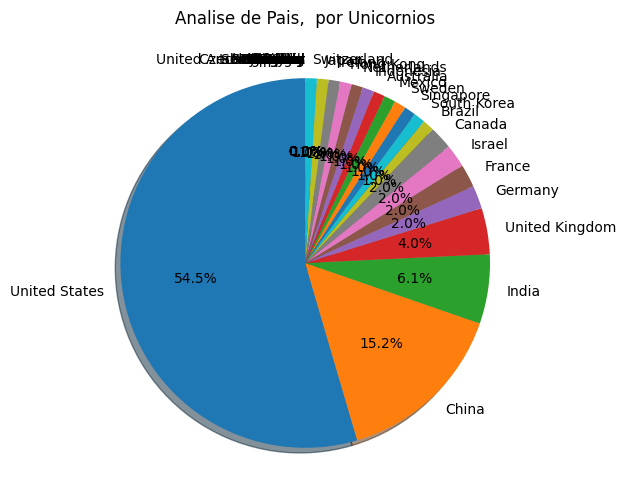

In [166]:
# Analise de Empresas por Pais

plt.figure(figsize=(15,6))
plt.title('Analise de Pais,  por Unicornios')
plt.pie(
Analise,
labels = Analise.index,
shadow=True,
startangle=90,
autopct='%1.1f%%'
);


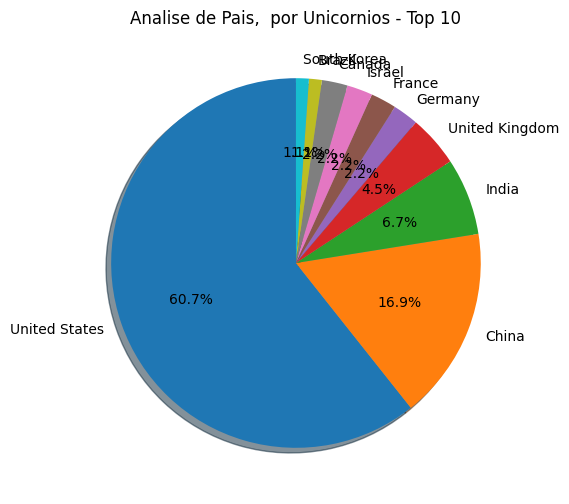

In [167]:
plt.figure(figsize=(15,6))
plt.title('Analise de Pais,  por Unicornios - Top 10')
plt.pie(
Analise.head(10),
labels = Analise.index[0:10],
shadow=True,
startangle=90,
autopct='%1.1f%%'
);

In [168]:
#Conversao para Data

Base_dados['Data de Adesão'] = pd.to_datetime(Base_dados['Data de Adesão'])
Base_dados['Data de Adesão'].head()

0   2017-04-07
1   2012-12-01
2   2018-07-03
3   2014-01-23
4   2018-01-08
Name: Data de Adesão, dtype: datetime64[ns]

In [169]:
# Extrair Ano e Mes
Base_dados['Mes'] = pd.DatetimeIndex(Base_dados['Data de Adesão']).month
Base_dados['Ano'] = pd.DatetimeIndex(Base_dados['Data de Adesão']).year

Base_dados.head()

,ID,Empresa,Valor ($B),Data de Adesão,Pais,City,Setor,Investidores,Mes,Ano
0,1,ByteDance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,2,SpaceX,$127,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,3,SHEIN,$100,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,4,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,5,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [170]:
#Tabela Analitica
Analise_Agrupada = Base_dados.groupby(by=['Pais', 'Ano', 'Mes', 'Empresa']).count()['ID'].reset_index();

In [171]:
Analise_Agrupada.loc[
Analise_Agrupada['Pais'] == 'Brazil'
]

,Pais,Ano,Mes,Empresa,ID
16,Brazil,2018,7,Movile,1
17,Brazil,2018,11,iFood,1
18,Brazil,2019,6,Loggi,1
19,Brazil,2019,9,QuintoAndar,1
20,Brazil,2019,10,EBANX,1
21,Brazil,2019,12,Wildlife Studios,1
22,Brazil,2020,1,Loft,1
23,Brazil,2020,12,C6 Bank,1
24,Brazil,2020,12,Creditas,1
25,Brazil,2021,1,MadeiraMadeira,1


In [172]:
#Transformando Coluna em Valor Numerico
Base_dados['Valor ($B)'] = pd.to_numeric(Base_dados['Valor ($B)'].astype(str).str.replace('$', ''))

Base_dados.head()

,ID,Empresa,Valor ($B),Data de Adesão,Pais,City,Setor,Investidores,Mes,Ano
0,1,ByteDance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,2,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,3,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,4,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,5,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [192]:
# Selecionar colunas do tipo datetime64
#Base_dados.groupby(by=['Pais','Setor']).sum()['Valor ($B)'].reset_index()

Base_dados['Valor ($B)'] = Base_dados['Valor ($B)'].astype(str).str.replace('$', '').str.replace('B', '').astype(float)
Analise_Pais = Base_dados.groupby(by=['Pais'])['Valor ($B)'].sum().reset_index()
Analise_Pais.head()



,Pais,Valor ($B)
0,Argentina,2.45
1,Australia,54.40
2,Austria,7.61
3,Bahamas,32.00
4,Belgium,8.95


In [196]:
Analise_Valor = Analise_Pais.sort_values('Valor ($B)', ascending=False)
Analise_Valor.head()

,Pais,Valor ($B)
46,United States,2069.89
9,China,678.59
45,United Kingdom,205.45
20,India,202.92
18,Germany,80.88


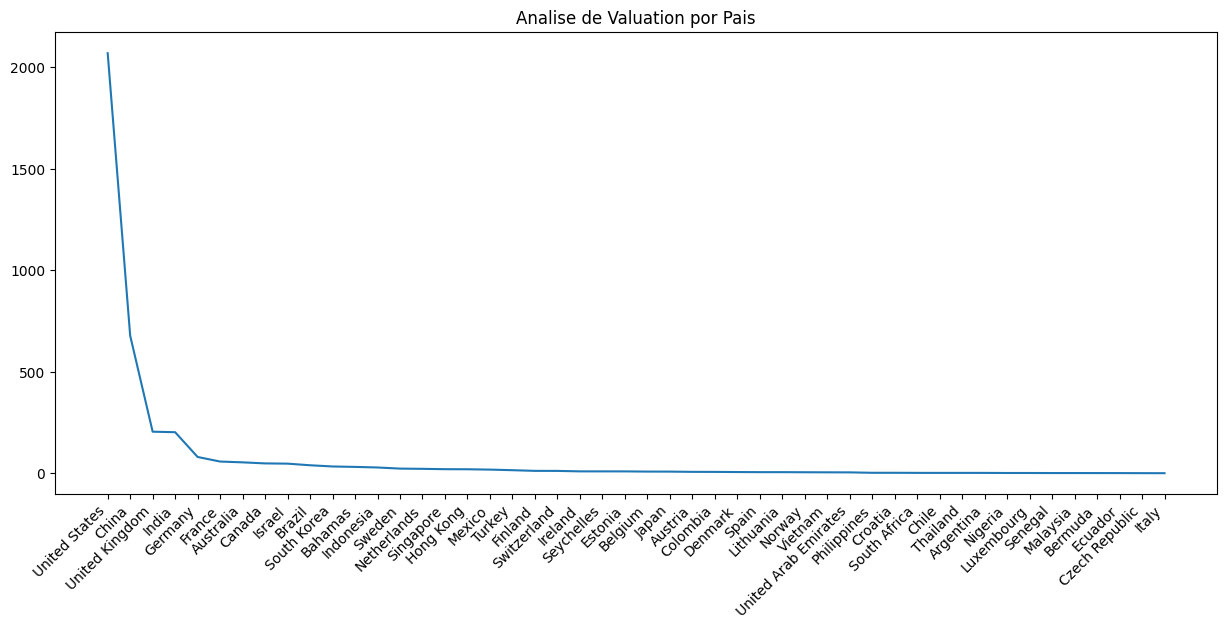

In [204]:
#Grafico de Valuation por Unicornio
plt.figure(figsize=(15,6))
plt.plot(Analise_Valor['Pais'], Analise_Valor['Valor ($B)'])
plt.title('Analise de Valuation por Pais')
plt.xticks(rotation=45, ha='right');